In [ ]:
#Instalar librerías necesarias
#dbutils.library.installPyPI("mixtend", version="0.17.2")
!pip install mlxtend  

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#importar la librerias
import pandas as pd
import os
import matplotlib.pyplot as plt
import re
import datetime as dt
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

plt.style.use('seaborn')
sns.set_style('darkgrid')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
os.listdir('/content/drive/MyDrive/Colab Notebooks/files')

['Sales_September_2019.csv',
 'Sales_November_2019.csv',
 'Sales_March_2019.csv',
 'Sales_July_2019.csv',
 'Sales_January_2019.csv',
 'Sales_October_2019.csv',
 'Sales_May_2019.csv',
 'Sales_April_2019.csv',
 'Sales_June_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv']

In [ ]:
os.listdir('files')

['Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

In [ ]:
#leactura de csv de pandas
df=pd.DataFrame()

In [ ]:
#@title Texto de título predeterminado
files=os.listdir('/content/drive/MyDrive/Colab Notebooks/files')
for x in files:
    file=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/files/'+x)
    df=pd.concat([file,df])


In [ ]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,150502,iPhone,1,700,02/18/19 01:35,"866 Spruce St, Portland, ME 04101"
1,150503,AA Batteries (4-pack),1,3.84,02/13/19 07:24,"18 13th St, San Francisco, CA 94016"
2,150504,27in 4K Gaming Monitor,1,389.99,02/18/19 09:46,"52 6th St, New York City, NY 10001"
3,150505,Lightning Charging Cable,1,14.95,02/02/19 16:47,"129 Cherry St, Atlanta, GA 30301"
4,150506,AA Batteries (4-pack),2,3.84,02/28/19 20:32,"548 Lincoln St, Seattle, WA 98101"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


In [ ]:
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [ ]:
#conteo de valores nulos
df['Order ID'].isnull().value_counts()

False    186305
True        545
Name: Order ID, dtype: int64

In [ ]:
df=df[df['Order ID'].notnull()]

In [ ]:
df.isnull().value_counts()

Order ID  Product  Quantity Ordered  Price Each  Order Date  Purchase Address
False     False    False             False       False       False               186305
dtype: int64

In [ ]:
#definir el tipo de cada variable
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,150502,iPhone,1,700,02/18/19 01:35,"866 Spruce St, Portland, ME 04101"
1,150503,AA Batteries (4-pack),1,3.84,02/13/19 07:24,"18 13th St, San Francisco, CA 94016"
2,150504,27in 4K Gaming Monitor,1,389.99,02/18/19 09:46,"52 6th St, New York City, NY 10001"
3,150505,Lightning Charging Cable,1,14.95,02/02/19 16:47,"129 Cherry St, Atlanta, GA 30301"
4,150506,AA Batteries (4-pack),2,3.84,02/28/19 20:32,"548 Lincoln St, Seattle, WA 98101"


In [ ]:
df=df[df['Product']!='Product']

In [ ]:
df['Quantity Ordered']=df['Quantity Ordered'].astype('int64')
df['Price Each']=df['Price Each'].astype('float')
df['Order Date']=pd.to_datetime(df['Order Date'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int64         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 9.9+ MB


# CUAL FUE EL MES CON LA VENTA MAS ALTA

In [ ]:
#extraer el mes
df['Mes']=df['Order Date'].dt.month\

#realizar la multiplicacion de precio por cantidad
df['Total_Ventas']=df['Quantity Ordered']*df['Price Each']

In [ ]:
#agrupaciones primero por mes
df_mes=df.groupby('Mes').sum()

#resetear el indice
df_mes=df_mes.reset_index()


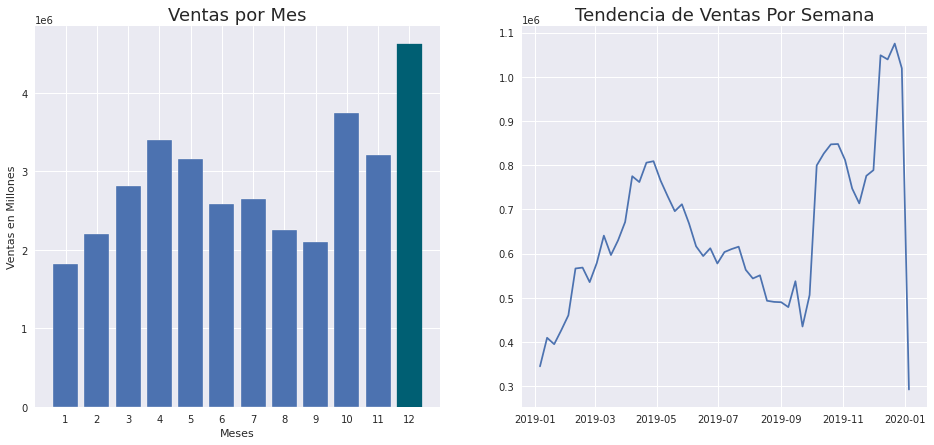

In [ ]:
#subplot de graficos
fig, axes=plt.subplots(1,2, figsize=(16,7))
ax1=plt.subplot(1,2,1)
ax2=plt.subplot(1,2,2)
bars=ax1.bar(df_mes['Mes'], df_mes['Total_Ventas'])
ax2.plot(df_fecha['Total_Ventas'])
ax1.set_xticks(df_mes['Mes'])
ax1.set_title('Ventas por Mes', size=18)
ax2.set_title('Tendencia de Ventas Por Semana', size=18)

ax1.set_xlabel('Meses')
ax1.set_ylabel('Ventas en Millones')
bars[11].set_color('#005f73')

plt.show()


In [ ]:
#df_mes

In [ ]:
#agrupacion la voy haver por fecha
df_fecha=df.groupby('Order Date').sum()

In [ ]:
df_fecha=df_fecha.resample('W').sum()
#df_fecha

In [ ]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Mes,Total_Ventas
0,150502,iPhone,1,700.00,2019-02-18 01:35:00,"866 Spruce St, Portland, ME 04101",2,700.00
1,150503,AA Batteries (4-pack),1,3.84,2019-02-13 07:24:00,"18 13th St, San Francisco, CA 94016",2,3.84
2,150504,27in 4K Gaming Monitor,1,389.99,2019-02-18 09:46:00,"52 6th St, New York City, NY 10001",2,389.99
3,150505,Lightning Charging Cable,1,14.95,2019-02-02 16:47:00,"129 Cherry St, Atlanta, GA 30301",2,14.95
4,150506,AA Batteries (4-pack),2,3.84,2019-02-28 20:32:00,"548 Lincoln St, Seattle, WA 98101",2,7.68


# CUAL ES LA CIUDAD CON MAYOR VENTA

In [ ]:
df['Ciudad']=df['Purchase Address'].apply(lambda x: x.split(',')[1])
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Mes,Total_Ventas,Ciudad
0,150502,iPhone,1,700.00,2019-02-18 01:35:00,"866 Spruce St, Portland, ME 04101",2,700.00,Portland
1,150503,AA Batteries (4-pack),1,3.84,2019-02-13 07:24:00,"18 13th St, San Francisco, CA 94016",2,3.84,San Francisco
2,150504,27in 4K Gaming Monitor,1,389.99,2019-02-18 09:46:00,"52 6th St, New York City, NY 10001",2,389.99,New York City
3,150505,Lightning Charging Cable,1,14.95,2019-02-02 16:47:00,"129 Cherry St, Atlanta, GA 30301",2,14.95,Atlanta
4,150506,AA Batteries (4-pack),2,3.84,2019-02-28 20:32:00,"548 Lincoln St, Seattle, WA 98101",2,7.68,Seattle


In [ ]:
#grafica para ver la ciudad
df_ciudad=df.groupby('Ciudad').sum()

df_ciudad=df_ciudad.reset_index()


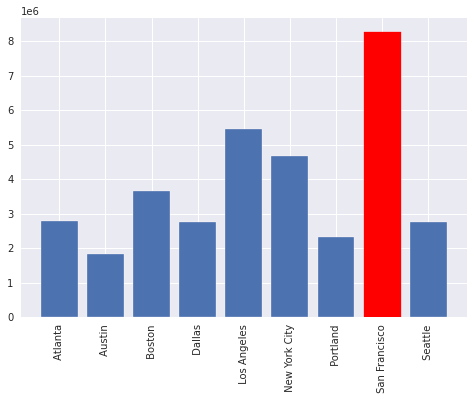

In [ ]:
bars=plt.bar(df_ciudad['Ciudad'], df_ciudad['Total_Ventas'])
plt.xticks(rotation=90)
bars[7].set_color('r')
plt.show()

# CUAL ES LA HORA A QUE MAS SE VENDEN PRODUCTOS

In [ ]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Mes,Total_Ventas,Ciudad
0,150502,iPhone,1,700.00,2019-02-18 01:35:00,"866 Spruce St, Portland, ME 04101",2,700.00,Portland
1,150503,AA Batteries (4-pack),1,3.84,2019-02-13 07:24:00,"18 13th St, San Francisco, CA 94016",2,3.84,San Francisco
2,150504,27in 4K Gaming Monitor,1,389.99,2019-02-18 09:46:00,"52 6th St, New York City, NY 10001",2,389.99,New York City
3,150505,Lightning Charging Cable,1,14.95,2019-02-02 16:47:00,"129 Cherry St, Atlanta, GA 30301",2,14.95,Atlanta
4,150506,AA Batteries (4-pack),2,3.84,2019-02-28 20:32:00,"548 Lincoln St, Seattle, WA 98101",2,7.68,Seattle


In [ ]:
df['Hora']=df['Order Date'].apply(lambda x: x.hour)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Mes,Total_Ventas,Ciudad,Hora
0,150502,iPhone,1,700.00,2019-02-18 01:35:00,"866 Spruce St, Portland, ME 04101",2,700.00,Portland,1
1,150503,AA Batteries (4-pack),1,3.84,2019-02-13 07:24:00,"18 13th St, San Francisco, CA 94016",2,3.84,San Francisco,7
2,150504,27in 4K Gaming Monitor,1,389.99,2019-02-18 09:46:00,"52 6th St, New York City, NY 10001",2,389.99,New York City,9
3,150505,Lightning Charging Cable,1,14.95,2019-02-02 16:47:00,"129 Cherry St, Atlanta, GA 30301",2,14.95,Atlanta,16
4,150506,AA Batteries (4-pack),2,3.84,2019-02-28 20:32:00,"548 Lincoln St, Seattle, WA 98101",2,7.68,Seattle,20


In [ ]:
df.to_csv("ventas2019.csv", index=False)

In [ ]:
products = pd.DataFrame(data={'Product': df["Product"].unique()})
# Agregar columna ID
products["Product ID"] = products.index
products = products[['Product ID','Product']]
products.head()

,Product ID,Product
0,0,iPhone
1,1,AA Batteries (4-pack)
2,2,27in 4K Gaming Monitor
3,3,Lightning Charging Cable
4,4,Apple Airpods Headphones


In [ ]:
products.to_csv("productos2019.csv", index=False)

In [ ]:
#agrupacion por las horas 
df_hour=df.groupby('Hora').sum()
df_hour=df_hour.reset_index()

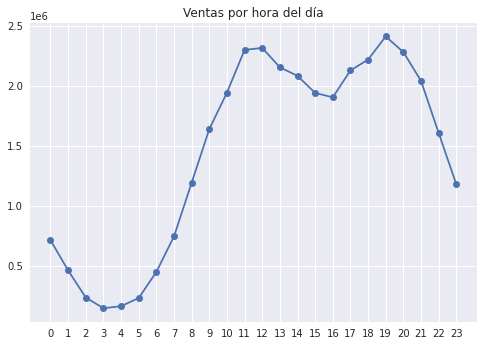

In [ ]:
#grafica de lineas
plt.plot(df_hour['Total_Ventas'], marker='o')
plt.xticks(df_hour['Hora'])
plt.title('Ventas por hora del día')

plt.show()

# CUALES SON LOS PRODUCTOS QUE SE VENDEN JUNTOS

In [ ]:
df=df[df['Order ID'].duplicated(keep=False)]

df['agrupado']=df.groupby(['Order ID'])['Product'].transform(lambda x: ','.join(x))

df=df[['Order ID', 'agrupado']].drop_duplicates()

In [ ]:
import itertools
from itertools import combinations #genera el conjutno de combinaciones
import collections
from collections import Counter #simplemente para realizar conteos

In [ ]:
count = Counter()

for r in df['agrupado']:
    filas= r.split(',')
    count.update(Counter(combinations(filas, 2)))

In [ ]:
count

In [ ]:
comunes=count.most_common(10)
comunes

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

### **ALGORITMOS DE CANASTA**



In [ ]:
#Agrupando los datos
dataset_transformado=df.groupby(['Order ID', 'Product'])['Quantity Ordered'].sum()
dataset_transformado

Order ID  Product                   
141234    iPhone                        1
141235    Lightning Charging Cable      1
141236    Wired Headphones              2
141237    27in FHD Monitor              1
141238    Wired Headphones              1
                                       ..
319666    Lightning Charging Cable      1
319667    AA Batteries (4-pack)         2
319668    Vareebadd Phone               1
319669    Wired Headphones              1
319670    Bose SoundSport Headphones    1
Name: Quantity Ordered, Length: 185639, dtype: int64

In [ ]:
#Colocamos los productos como columnas y las facturas como filas
dataset_transformado=dataset_transformado.unstack()
dataset_transf=pd.DataFrame(dataset_transformado)
dataset_transformado


Product,20in Monitor,27in 4K Gaming Monitor,27in FHD Monitor,34in Ultrawide Monitor,AA Batteries (4-pack),AAA Batteries (4-pack),Apple Airpods Headphones,Bose SoundSport Headphones,Flatscreen TV,Google Phone,LG Dryer,LG Washing Machine,Lightning Charging Cable,Macbook Pro Laptop,ThinkPad Laptop,USB-C Charging Cable,Vareebadd Phone,Wired Headphones,iPhone
Order ID,,,,,,,,,,,,,,,,,,,
141234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
141235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
141236,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN
141237,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
141238,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319666,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
319667,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
319668,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN


In [ ]:
#Reemplazar los valores nulos por cero (0)
basket=dataset_transformado.fillna(0)
basket.head()

Product,20in Monitor,27in 4K Gaming Monitor,27in FHD Monitor,34in Ultrawide Monitor,AA Batteries (4-pack),AAA Batteries (4-pack),Apple Airpods Headphones,Bose SoundSport Headphones,Flatscreen TV,Google Phone,LG Dryer,LG Washing Machine,Lightning Charging Cable,Macbook Pro Laptop,ThinkPad Laptop,USB-C Charging Cable,Vareebadd Phone,Wired Headphones,iPhone
Order ID,,,,,,,,,,,,,,,,,,,
141234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
141235,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
141236,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
141237,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
141238,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
#Cambiar todos los registros a binarios (0,1).
def encode_units(x):
  if x<=0:
    return 0
  if x>=1:
    return 1

basket_sets=basket.applymap(encode_units)
basket_sets.head()

Product,20in Monitor,27in 4K Gaming Monitor,27in FHD Monitor,34in Ultrawide Monitor,AA Batteries (4-pack),AAA Batteries (4-pack),Apple Airpods Headphones,Bose SoundSport Headphones,Flatscreen TV,Google Phone,LG Dryer,LG Washing Machine,Lightning Charging Cable,Macbook Pro Laptop,ThinkPad Laptop,USB-C Charging Cable,Vareebadd Phone,Wired Headphones,iPhone
Order ID,,,,,,,,,,,,,,,,,,,
141234,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
141235,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
141236,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
141237,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
141238,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
#Implementar Apriori
#Filtrar por el soporte
#Generar un conjunto de elementos frecuentes que tengan un valor de soporte 
#mínimo del 5%, es decir, que tenga una frecuencia de al menos 5%
#del total de transacciones

**¿Cuál es el top 10 de productos que se venden con mayor frecuencia**

In [ ]:
frecuent_itemsets=apriori(basket_sets, min_support=0.002,use_colnames=True)
frecuent_itemsets.sort_values(by='support',ascending=False)

,support,itemsets
15,0.122480,(USB-C Charging Cable)
12,0.121074,(Lightning Charging Cable)
5,0.115408,(AAA Batteries (4-pack))
4,0.115122,(AA Batteries (4-pack))
17,0.105623,(Wired Headphones)
6,0.087005,(Apple Airpods Headphones)
7,0.074525,(Bose SoundSport Headphones)
2,0.042020,(27in FHD Monitor)
18,0.038333,(iPhone)
1,0.034886,(27in 4K Gaming Monitor)


**Relación entre los productos**

In [ ]:
rules=association_rules(frecuent_itemsets,metric="lift", min_threshold=1)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(USB-C Charging Cable),(Google Phone),0.122480,0.030946,0.005587,0.045619,1.474120,0.001797,1.015374
1,(Google Phone),(USB-C Charging Cable),0.030946,0.122480,0.005587,0.180551,1.474120,0.001797,1.070865
2,(Lightning Charging Cable),(iPhone),0.121074,0.038333,0.005666,0.046797,1.220804,0.001025,1.008880
3,(iPhone),(Lightning Charging Cable),0.038333,0.121074,0.005666,0.147807,1.220804,0.001025,1.031370
4,(Vareebadd Phone),(USB-C Charging Cable),0.011573,0.122480,0.002062,0.178208,1.454996,0.000645,1.067813


**Conclusiones:**

*   **Los 10 productos más populares en ventas son:**
1. USB-C Charging Cable
2. Lightning Charging Cable
3. AAA Batteries (4-pack)
4. AA Batteries (4-pack)
5. Wired Headphones
6. Apple Airpods Headphones
7. Bose SoundSport Headphones
8. 27in FHD Monitor
9. Iphone
10. 27in 4K Gaming Monitor


*  El **Google Phone** y el **USB-C Charging Cable** ocurren juntos 1.474120 veces más que al azar, por lo que se concluye que existe una relación positiva
*  El porcentaje de veces que se compra **Google Phone**, dado que se compró **USB-C Charging Cable** es del 18.0551%
*  El porcentaje de veces que se compra **USB-C Charging Cable**, dado que se compró **Google Phone** es del 4.5619%

---

*  El **IPhone** y el **Lightning Charging** Cable ocurren juntos 1.220804 veces más que al azar, por lo que se concluye que existe una relación positiva
*  El porcentaje de veces que se compra **IPhone**, dado que se compró **Lightning Charging Cable** es del 14.8%
*  El porcentaje de veces que se compra **Lightning Charging Cable**, dado que se compró **IPhone** es del 4.7%

---


*   El Vareebadd **Phone** y el **USB-C Charging Cable** ocurren juntos 1.454996 veces más que al azar, por lo que se concluye que existe una relación positiva
*  El porcentaje de veces que se compra **Vareebadd Phone**, dado que se compró **USB-C Charging Cable** es del 17.8%

---

1. El **IPhone** y el **Lightning Charging Cable** representan el 0.5666% de las transacciones

2. El **Google Phone** y el **USB-C Charging Cable** representan el 0.5587% de las transacciones

3. El **Vareebadd Phone** y el **USB-C Charging Cable** representan el 0.2062% de las transacciones








# **Posibles decisiones estratégicas**

1. Colocar Google Phone y el USB-C Charging Cable cerca para aumentar las posibilidades de venta cruzada

2. Colocar IPhone y Lightning Charging Cable cerca para aumentar las posibilidades de venta cruzada

3. Colocar Vareebadd Phone y el USB-C Charging Cable cerca para aumentar las posibilidades de venta cruzada

4. Crear un motor de recomendación en línea. Por ejemplo, colocar el top 10 productos más vendidos

5. Dirigir campañas de marketing enviando cupones promocionales a clientes para productos relacionados con artículos que compraron recientemente
